In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import gensim.models.fasttext as ft

In [3]:
#  htmlを分解していろいろ中身を取り出すためのパッケージ
from pyquery import PyQuery as pq
from pprint import pprint
# 正規表現を取り扱うパッケージ
import re

In [4]:
# 取り出し元のurl
url_o = "http://hayabusa.open2ch.net"
# 取り出し物のurlだけどスレッドが一覧になってるスレ一覧　
# サッカーch
# url = "http://hayabusa.open2ch.net/livefoot/subback.html"
# 日本代表ch
url = "http://kohada.open2ch.net/eleven/subback.html"

In [5]:
# pyqueryを用いてスレイ知覧urlからhtmlを分解した状態で取得
dom = pq(url)

In [6]:
dom

[<html>]

In [7]:
linked_urls = [(url_o + link.attr["href"])[:-3] for link in dom("a").items()]

In [8]:
import time

texts = ""
# 全部のスレッドにアクセスしてhtmlを拾ってきてからddタグが付いた要素だけを抽出して、
# その後に全部のレスを抜き出してtexts変数に突っ込むforループ
for i, link_url in enumerate(linked_urls):
    print(i)
    # 各スレッドのアドレスからhtmlを分解した状態で抽出と
    thread = pq(link_url)
    # dd要素を抽出
    each_thread_doms = thread.find("dd")
    # 各スレッドからレスを全部抽出するforループ
    for each_thread_dom in each_thread_doms:
        #print(str(pq(each_thread_dom)))
        # レスがまとまった非文字列になってるため、それを全部文字列に変換する
        strtype_each_thread_res = str(pq(each_thread_dom))
        # レスのみを抽出するために余分な部分を全部排除する
        # > >の文字そのもの
        # [\s\S] スペースや改行も含めたあらゆる文字列( . スペースや開業を含まない何にか文字 )
        # * 直前の文字の繰り返し（何回でもいい）
        # ? 直前の文字の繰り返しを最短マッチに限る
        # <ares <aresって文字列
        # >バックレ伝説を聞くけど間近で見たことはない<br/>\n<ares
        # >から始まって、その後に改行もスペースもありでなんかの文字列がずっと続いた後に、
        # <aresという文字列がやってくるパターンを最短マッチのものに限り抽出しろ
        res = re.search(">[\s\S]*?<ares", strtype_each_thread_res)
        # tryは例外処理って呼ばれる構文
        try:
            # 文字列textsにとりだした結果を格納
            # groupは正規表現の結果から取り出す関数 
            texts += res.group()[1:-5]
        except:
            print(str(pq(each_thread_dom)))
    # サーばに負荷かけないように1秒休む
    time.sleep(1)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


In [9]:
# 不要なタグの残りを削除してる
output_text = pq(texts.replace("<br/>", "").replace("\n", "\\n"))

In [10]:
output_text = str(output_text.remove("div").remove("a").remove("br"))

In [11]:
# \nがpqとおすと消える恐れがあるので元に戻す
output_text = output_text.replace("\\n", "\n ")

In [15]:
# 整形しおわった本文抽出結果を保存
# encoding='UTF-8'をつけないと'cp932' codec can't encode characterというエラー
# https://ja.stackoverflow.com/questions/34431/python-%E3%82%A8%E3%83%A9%E3%83%BCcp932-codec-cant-encode-character
fw = open("2chtext.txt", "w", encoding="utf-8")

In [16]:
fw.write(output_text + "\n")

27031

In [17]:
fw.close()

In [18]:
# textを読み込む
# このファイルはまだ分かち書きする前のファイル
file = open('2chtext.txt', 'r')  #読み込みモードでオープン
string_2ch = file.read()      #readですべて読み込む

In [19]:
print(string_2ch)

<p>A代表スレ
 予選突破した監督を電通都合で解任腐れJFA勝ちより腐れ広告もういいからカズ連れてって成仏させてやれ
 いつまでたっても強くなれない誰が監督やっても監督指示無視して俺たちのバックパス固持パスが来ると腰が引けるチャンスに何としてでも走らないシュートは謙虚に譲り合いキックオフの瞬間から足が止まってる口ばっかりの上に記者会見でぎゃん泣きもうやめちまえ
 他のチームが戦い走り負け勝ちゴールの喜びをファンと分かち合う間永遠にパス回ししてろ
 <img rel="nofollow" width="12" height="12" src="http://img.youtube.com/vi/pP6gbmWrJjI/default.jpg"/>  
 <img rel="nofollow" width="12" height="12" src="http://img.youtube.com/vi/a0wdoFvxrm4/default.jpg"/>  
 <img rel="nofollow" width="12" height="12" src="http://img.youtube.com/vi/L3SmOxNP_Oc/default.jpg"/> <img rel="nofollow" width="12" height="12" src="http://img.youtube.com/vi/LXXnRZg0aNc/default.jpg"/> <img rel="nofollow" width="12" height="12" src="http://img.youtube.com/vi/oWe6kngQrR0/default.jpg"/>  
 南郷と乾貴士とは縁が深いんだよなぁ南郷にはセゾンフットボールクラブを作った人の子供がいてそのセゾンサッカーが野洲高校全国制覇を生んだ滋賀の若い親世代の子どもはサッカーをするからその流れが草津→守山→野洲って感じで移り変わっていきちょうど人口増加率も相まってスポーツも勉学も強くなって行ったんだよね２００１年くらいに草津東が全国で２位になっている、その時の優勝校は走りまくる国見高校で大久保嘉人がいた。帝京高校には田中達也がいる。そこから時代は流れ２００７年頃だったか野洲がみるみる勝ち上がっていき全国制覇をしたのだこれ

In [20]:
type(string_2ch)

str

In [21]:
# fileを閉じる
file.close()

In [ ]:
## ここから品詞取得・整形へ

In [25]:
# 品詞も取得できるようにする
from natto import MeCab
mc = MeCab()
print(mc.parse(string_2ch))

<	名詞,サ変接続,*,*,*,*,*
p	名詞,一般,*,*,*,*,*
>	名詞,サ変接続,*,*,*,*,*
A	名詞,一般,*,*,*,*,*
代表	名詞,サ変接続,*,*,*,*,代表,ダイヒョウ,ダイヒョー
スレ	名詞,一般,*,*,*,*,*
予選	名詞,一般,*,*,*,*,予選,ヨセン,ヨセン
突破	名詞,サ変接続,*,*,*,*,突破,トッパ,トッパ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
監督	名詞,サ変接続,*,*,*,*,監督,カントク,カントク
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
電通	名詞,固有名詞,組織,*,*,*,電通,デンツウ,デンツー
都合	名詞,一般,*,*,*,*,都合,ツゴウ,ツゴー
で	助詞,格助詞,一般,*,*,*,で,デ,デ
解任	名詞,サ変接続,*,*,*,*,解任,カイニン,カイニン
腐れ	名詞,一般,*,*,*,*,腐れ,クサレ,クサレ
JFA	名詞,一般,*,*,*,*,*
勝ち	名詞,接尾,一般,*,*,*,勝ち,ガチ,ガチ
より	助詞,格助詞,一般,*,*,*,より,ヨリ,ヨリ
腐れ	名詞,一般,*,*,*,*,腐れ,クサレ,クサレ
広告	名詞,サ変接続,*,*,*,*,広告,コウコク,コーコク
もう	副詞,一般,*,*,*,*,もう,モウ,モー
いい	形容詞,自立,*,*,形容詞・イイ,基本形,いい,イイ,イイ
から	助詞,接続助詞,*,*,*,*,から,カラ,カラ
カズ	名詞,固有名詞,人名,一般,*,*,カズ,カズ,カズ
連れ	名詞,接尾,一般,*,*,*,連れ,ヅレ,ズレ
てっ	動詞,自立,*,*,五段・ラ行,連用タ接続,てる,テッ,テッ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
成仏	名詞,サ変接続,*,*,*,*,成仏,ジョウブツ,ジョーブツ
さ	動詞,自立,*,*,サ変・スル,未然レル接続,する,サ,サ
せ	動詞,接尾,*,*,一段,連用形,せる,セ,セ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
やれ	動詞,非自立,*,*,五段・ラ行,命令ｅ,やる,ヤレ,ヤレ
いつ	名詞,代名詞,一般,*,*,*,いつ,イツ,イツ
まで	助詞,副助詞,*,*,*,*,まで,マデ,マデ
たっ	動詞,自立,*,*,五

In [26]:
# 単語＆品詞分解したものを変数に入れる
result_hinshi_bunkai = mc.parse(string_2ch)

In [27]:
result_hinshi_bunkai

'<\t名詞,サ変接続,*,*,*,*,*\np\t名詞,一般,*,*,*,*,*\n>\t名詞,サ変接続,*,*,*,*,*\nA\t名詞,一般,*,*,*,*,*\n代表\t名詞,サ変接続,*,*,*,*,代表,ダイヒョウ,ダイヒョー\nスレ\t名詞,一般,*,*,*,*,*\n予選\t名詞,一般,*,*,*,*,予選,ヨセン,ヨセン\n突破\t名詞,サ変接続,*,*,*,*,突破,トッパ,トッパ\nし\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ\nた\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ\n監督\t名詞,サ変接続,*,*,*,*,監督,カントク,カントク\nを\t助詞,格助詞,一般,*,*,*,を,ヲ,ヲ\n電通\t名詞,固有名詞,組織,*,*,*,電通,デンツウ,デンツー\n都合\t名詞,一般,*,*,*,*,都合,ツゴウ,ツゴー\nで\t助詞,格助詞,一般,*,*,*,で,デ,デ\n解任\t名詞,サ変接続,*,*,*,*,解任,カイニン,カイニン\n腐れ\t名詞,一般,*,*,*,*,腐れ,クサレ,クサレ\nJFA\t名詞,一般,*,*,*,*,*\n勝ち\t名詞,接尾,一般,*,*,*,勝ち,ガチ,ガチ\nより\t助詞,格助詞,一般,*,*,*,より,ヨリ,ヨリ\n腐れ\t名詞,一般,*,*,*,*,腐れ,クサレ,クサレ\n広告\t名詞,サ変接続,*,*,*,*,広告,コウコク,コーコク\nもう\t副詞,一般,*,*,*,*,もう,モウ,モー\nいい\t形容詞,自立,*,*,形容詞・イイ,基本形,いい,イイ,イイ\nから\t助詞,接続助詞,*,*,*,*,から,カラ,カラ\nカズ\t名詞,固有名詞,人名,一般,*,*,カズ,カズ,カズ\n連れ\t名詞,接尾,一般,*,*,*,連れ,ヅレ,ズレ\nてっ\t動詞,自立,*,*,五段・ラ行,連用タ接続,てる,テッ,テッ\nて\t助詞,接続助詞,*,*,*,*,て,テ,テ\n成仏\t名詞,サ変接続,*,*,*,*,成仏,ジョウブツ,ジョーブツ\nさ\t動詞,自立,*,*,サ変・スル,未然レル接続,する,サ,サ\nせ\t動詞,接尾,*,*,一段,連用形,せる,セ,セ\nて\t助詞,接続助詞,*,*,*,*,て,テ,テ\nやれ\t動詞,非自立,*,*,五段・ラ行,命令ｅ,やる,ヤレ,ヤレ\n

In [28]:
import re
word_typeinfo_text_list = re.findall("[^ \n]*\t[^ \n]*?,", result_hinshi_bunkai)

In [29]:
print(word_typeinfo_text_list)

['<\t名詞,', 'p\t名詞,', '>\t名詞,', 'A\t名詞,', '代表\t名詞,', 'スレ\t名詞,', '予選\t名詞,', '突破\t名詞,', 'し\t動詞,', 'た\t助動詞,', '監督\t名詞,', 'を\t助詞,', '電通\t名詞,', '都合\t名詞,', 'で\t助詞,', '解任\t名詞,', '腐れ\t名詞,', 'JFA\t名詞,', '勝ち\t名詞,', 'より\t助詞,', '腐れ\t名詞,', '広告\t名詞,', 'もう\t副詞,', 'いい\t形容詞,', 'から\t助詞,', 'カズ\t名詞,', '連れ\t名詞,', 'てっ\t動詞,', 'て\t助詞,', '成仏\t名詞,', 'さ\t動詞,', 'せ\t動詞,', 'て\t助詞,', 'やれ\t動詞,', 'いつ\t名詞,', 'まで\t助詞,', 'たっ\t動詞,', 'て\t助詞,', 'も\t助詞,', '強く\t形容詞,', 'なれ\t動詞,', 'ない\t助動詞,', '誰\t名詞,', 'が\t助詞,', '監督\t名詞,', 'やっ\t動詞,', 'て\t助詞,', 'も\t助詞,', '監督\t名詞,', '指示\t名詞,', '無視\t名詞,', 'し\t動詞,', 'て\t助詞,', '俺\t名詞,', 'たち\t名詞,', 'の\t助詞,', 'バック\t名詞,', 'パス\t名詞,', '固持\t名詞,', 'パス\t名詞,', 'が\t助詞,', '来る\t動詞,', 'と\t助詞,', '腰\t名詞,', 'が\t助詞,', '引ける\t動詞,', 'チャンス\t名詞,', 'に\t助詞,', '何\t名詞,', 'と\t助詞,', 'し\t動詞,', 'て\t助詞,', 'でも\t助詞,', '走ら\t動詞,', 'ない\t助動詞,', 'シュート\t名詞,', 'は\t助詞,', '謙虚\t名詞,', 'に\t助詞,', '譲り合い\t動詞,', 'キックオフ\t名詞,', 'の\t助詞,', '瞬間\t名詞,', 'から\t助詞,', '足\t名詞,', 'が\t助詞,', '止まっ\t動詞,', 'てる\t動詞,', '口\t名詞,', 'ばっかり\t助詞,', 'の\t助詞,', '上\t名詞,', 'に\t助詞

In [30]:
# 何が取得されるか確認
word_typeinfo_text_list[1][:-1]

'p\t名詞'

In [31]:
# 後方1文字目の「’」を削除しリストに格納する内包表記
last_removed_list = [ word_typeinfo_text[:-1] for word_typeinfo_text in word_typeinfo_text_list]

In [32]:
# 削除されているか確認
print(last_removed_list)

['<\t名詞', 'p\t名詞', '>\t名詞', 'A\t名詞', '代表\t名詞', 'スレ\t名詞', '予選\t名詞', '突破\t名詞', 'し\t動詞', 'た\t助動詞', '監督\t名詞', 'を\t助詞', '電通\t名詞', '都合\t名詞', 'で\t助詞', '解任\t名詞', '腐れ\t名詞', 'JFA\t名詞', '勝ち\t名詞', 'より\t助詞', '腐れ\t名詞', '広告\t名詞', 'もう\t副詞', 'いい\t形容詞', 'から\t助詞', 'カズ\t名詞', '連れ\t名詞', 'てっ\t動詞', 'て\t助詞', '成仏\t名詞', 'さ\t動詞', 'せ\t動詞', 'て\t助詞', 'やれ\t動詞', 'いつ\t名詞', 'まで\t助詞', 'たっ\t動詞', 'て\t助詞', 'も\t助詞', '強く\t形容詞', 'なれ\t動詞', 'ない\t助動詞', '誰\t名詞', 'が\t助詞', '監督\t名詞', 'やっ\t動詞', 'て\t助詞', 'も\t助詞', '監督\t名詞', '指示\t名詞', '無視\t名詞', 'し\t動詞', 'て\t助詞', '俺\t名詞', 'たち\t名詞', 'の\t助詞', 'バック\t名詞', 'パス\t名詞', '固持\t名詞', 'パス\t名詞', 'が\t助詞', '来る\t動詞', 'と\t助詞', '腰\t名詞', 'が\t助詞', '引ける\t動詞', 'チャンス\t名詞', 'に\t助詞', '何\t名詞', 'と\t助詞', 'し\t動詞', 'て\t助詞', 'でも\t助詞', '走ら\t動詞', 'ない\t助動詞', 'シュート\t名詞', 'は\t助詞', '謙虚\t名詞', 'に\t助詞', '譲り合い\t動詞', 'キックオフ\t名詞', 'の\t助詞', '瞬間\t名詞', 'から\t助詞', '足\t名詞', 'が\t助詞', '止まっ\t動詞', 'てる\t動詞', '口\t名詞', 'ばっかり\t助詞', 'の\t助詞', '上\t名詞', 'に\t助詞', '記者\t名詞', '会見\t名詞', 'で\t助詞', 'ぎゃん\t名詞', '泣き\t動詞', 'もう\t副詞', 'やめ\t動詞', 'ちまえ\t動詞', '他\t名詞',

In [33]:
# 何が入っているか確認
last_removed_list[1]

'p\t名詞'

In [39]:
# last_removed_wordには何が格納されているのか確認→\tがない
for last_removed_word in last_removed_list:
    print(last_removed_word)

<	名詞
p	名詞
>	名詞
A	名詞
代表	名詞
スレ	名詞
予選	名詞
突破	名詞
し	動詞
た	助動詞
監督	名詞
を	助詞
電通	名詞
都合	名詞
で	助詞
解任	名詞
腐れ	名詞
JFA	名詞
勝ち	名詞
より	助詞
腐れ	名詞
広告	名詞
もう	副詞
いい	形容詞
から	助詞
カズ	名詞
連れ	名詞
てっ	動詞
て	助詞
成仏	名詞
さ	動詞
せ	動詞
て	助詞
やれ	動詞
いつ	名詞
まで	助詞
たっ	動詞
て	助詞
も	助詞
強く	形容詞
なれ	動詞
ない	助動詞
誰	名詞
が	助詞
監督	名詞
やっ	動詞
て	助詞
も	助詞
監督	名詞
指示	名詞
無視	名詞
し	動詞
て	助詞
俺	名詞
たち	名詞
の	助詞
バック	名詞
パス	名詞
固持	名詞
パス	名詞
が	助詞
来る	動詞
と	助詞
腰	名詞
が	助詞
引ける	動詞
チャンス	名詞
に	助詞
何	名詞
と	助詞
し	動詞
て	助詞
でも	助詞
走ら	動詞
ない	助動詞
シュート	名詞
は	助詞
謙虚	名詞
に	助詞
譲り合い	動詞
キックオフ	名詞
の	助詞
瞬間	名詞
から	助詞
足	名詞
が	助詞
止まっ	動詞
てる	動詞
口	名詞
ばっかり	助詞
の	助詞
上	名詞
に	助詞
記者	名詞
会見	名詞
で	助詞
ぎゃん	名詞
泣き	動詞
もう	副詞
やめ	動詞
ちまえ	動詞
他	名詞
の	助詞
チーム	名詞
が	助詞
戦い	名詞
走り	名詞
負け	名詞
勝ち	名詞
ゴール	名詞
の	助詞
喜び	名詞
を	助詞
ファン	名詞
と	助詞
分かち	動詞
合う	動詞
間	名詞
永遠	名詞
に	助詞
パス	名詞
回し	名詞
し	動詞
てろ	動詞
<	名詞
img	名詞
rel	名詞
="	名詞
nofollow	名詞
"	名詞
width	名詞
="	名詞
12	名詞
"	名詞
height	名詞
="	名詞
12	名詞
"	名詞
src	名詞
="	名詞
http	名詞
://	名詞
img	名詞
.	名詞
youtube	名詞
.	名詞
com	名詞
/	名詞
vi	名詞
/	名詞
pP	名詞
6	名詞
gbmWrJjI	名詞
/	名詞
default	名詞
.	名詞
jpg	名詞
"/>	名詞
<	名詞
img	名詞
rel	名詞
="	名詞
nofollow	名詞
"	名詞
width	

の	助詞
価値	名詞
が	助詞
ない	形容詞
柏木	名詞
と	助詞
金崎	名詞
使え	動詞
て	助詞
よかっ	形容詞
た	助動詞
これ	名詞
で	助詞
今後	名詞
の	助詞
戦術	名詞
に	助詞
幅	名詞
を	助詞
もたせ	動詞
られる	動詞
よ	助詞
ひどい	形容詞
こと	名詞
言う	動詞
よ	名詞
な	助動詞
ウイイレ	名詞
と	助詞
FIFA	名詞
など	助詞
ゲーム	名詞
が	助詞
正しい	形容詞
こと	名詞
が	助詞
証明	名詞
さ	動詞
れ	動詞
た	助動詞
な	助詞
要は	副詞
点	名詞
を	助詞
取れ	動詞
つ	助動詞
ー	名詞
こと	名詞
だ	助動詞
な	助詞
足	名詞
が	助詞
遅い	形容詞
の	名詞
は	助詞
論外	名詞
つ	助動詞
ー	名詞
こと	名詞
だ	助動詞
な	助詞
次に	接続詞
足元	名詞
、	記号
スタミナ	名詞
よく	形容詞
も	助詞
ま	フィラー
ー	名詞
あん	名詞
だけ	助詞
負け	動詞
られる	動詞
もん	名詞
だ	助動詞
・	記号
選手	名詞
一	名詞
名	名詞
に対し	助詞
三	名詞
名	名詞
まで	助詞
の	助詞
トレード	名詞
が	助詞
可能	名詞
・	記号
獲得	名詞
選手	名詞
と	助詞
同	接頭詞
ポジション	名詞
の	助詞
選手	名詞
が	助詞
放出	名詞
選手	名詞
に	助詞
最低	名詞
一	名詞
名	名詞
含ま	動詞
れ	動詞
て	助詞
いる	動詞
こと	名詞
・	記号
獲得	名詞
選手	名詞
、	記号
放出	名詞
選手	名詞
の	助詞
バランス	名詞
(	名詞
能力	名詞
/	名詞
経済	名詞
効果	名詞
/	名詞
将来	名詞
性	名詞
等	名詞
)	名詞
が	助詞
ある程度	副詞
妥当	名詞
で	助動詞
ある	助動詞
こと	名詞
・	記号
言葉	名詞
の	助詞
壁	名詞
、	記号
FIFA	名詞
規定	名詞
等	名詞
は	助詞
考え	動詞
なく	助動詞
て	助詞
よい	形容詞
どう	副詞
する	動詞
？	記号
まずは	接続詞
out	名詞
川島	名詞
　	記号
権田	名詞
　	記号
西川	名詞
in	名詞
ランゲラク	名詞
だ	助動詞
よ	助詞
な	助詞
？	記号
元	接頭詞
スレ	名詞
ニダ	名詞
ｳｪ	名詞
ｰﾊ	名詞
ｧｯ	名詞
ﾊｧ	名詞
ｯﾊ	名詞
ｧｯ	名詞
ｳｪ	名詞
ｰﾊ	名詞
ｧ

システム	名詞
を	助詞
指導	名詞
者	名詞
毎	名詞
輸入	名詞
する	動詞
必要	名詞
ある	動詞
そもそも	副詞
アジア	名詞
人	名詞
は	助詞
筋肉	名詞
の	助詞
質	名詞
で	助詞
生物	名詞
学	名詞
的	名詞
に	助詞
白人	名詞
黒人	名詞
に	助詞
劣っ	動詞
てる	動詞
ん	名詞
だ	助動詞
から	助詞
無理	名詞
げ	名詞
な	助動詞
ん	名詞
だ	助動詞
よ	助詞
な	助詞
科学	名詞
的	名詞
に	助詞
は	助詞
勝て	動詞
なく	助動詞
て	助詞
当然	副詞
てか	接続詞
八百長	名詞
を	助詞
疑っ	動詞
てる	動詞
よ	助詞
不自然	名詞
な	助動詞
ゴール	名詞
連発	名詞
し	動詞
てる	動詞
某	名詞
に	助詞
は	助詞
チーム	名詞
で	助詞
は	助詞
全く	副詞
活躍	名詞
でき	動詞
て	動詞
ない	助動詞
って	助詞
の	名詞
に	助詞
代表	名詞
で	助詞
は	助詞
点	名詞
を	助詞
都合	名詞
よく	副詞
取る	動詞
これ	名詞
が	助詞
スポーツ	名詞
ビジネス	名詞
の	助詞
暗部	名詞
ってか	接続詞
お前	名詞
ら	名詞
大概	名詞
全部	名詞
間違っ	動詞
てる	動詞
一番	名詞
の	助詞
違い	名詞
は	助詞
練習	名詞
量	名詞
勉強	名詞
し	動詞
ない	助動詞
馬鹿	名詞
な	助動詞
のに	助詞
勉強	名詞
の	助詞
方法	名詞
論	名詞
を	助詞
語っ	動詞
たり	助詞
、	記号
ノウハウ	名詞
本	接頭詞
熟読	名詞
し	動詞
てる	動詞
奴	名詞
いる	動詞
だろ	助動詞
？	記号
アレ	名詞
と	助詞
同じ	連体詞
ブラジル	名詞
人	名詞
の	助詞
小学生	名詞
は	助詞
晩	名詞
飯	名詞
食っ	動詞
た	助動詞
後	名詞
、	記号
体育館	名詞
で	助詞
練習	名詞
し	動詞
てる	動詞
地頭	名詞
が	助詞
いい	形容詞
奴	名詞
が	助詞
勉強	名詞
し	動詞
てる	動詞
みたい	名詞
な	助動詞
もん	名詞
だ	助動詞
日本人	名詞
は	助詞
地頭	名詞
が	助詞
よく	形容詞
ない	助動詞
くせ	名詞
に	助詞
勉強	名詞
も	助詞
し	動詞
ない	助動詞
奴	名詞
と	助詞
同じ	連体詞
全然	副詞
勉強	名詞
を	助詞
し	動詞
ない	助動詞
土人	名詞
国家	名詞

チーム	名詞
の	助詞
メンバー	名詞
は	助詞
大幅	名詞
に	助詞
変わる	動詞
だろ	助動詞
う	助動詞
。	記号
しかし	接続詞
、	記号
継承	名詞
さ	動詞
れる	動詞
もの	名詞
は	助詞
有る	動詞
はず	名詞
。	記号
攻撃	名詞
に	助詞
重心	名詞
を	助詞
置く	動詞
マインド	名詞
が	助詞
歴代	名詞
の	助詞
代表	名詞
A	名詞
チーム	名詞
に	助詞
継承	名詞
さ	動詞
れ	動詞
ない	助動詞
よう	名詞
で	助動詞
は	助詞
、	記号
全体	名詞
日本	名詞
サッカー	名詞
として	助詞
の	助詞
経験	名詞
値	名詞
を	助詞
積み重ねる	動詞
事	名詞
に	助詞
なら	動詞
ない	助動詞
の	名詞
で	助動詞
は	助詞
？	記号
と	助詞
思っ	動詞
た	助動詞
。	記号
つまり	接続詞
、	記号
結果	名詞
は	助詞
反省	名詞
し	動詞
なけれ	助動詞
ば	助詞
なら	動詞
ない	助動詞
が	助詞
、	記号
ビッグ	名詞
ゲーム	名詞
本番	名詞
で	助詞
、	記号
負け	名詞
易い	形容詞
(	名詞
カウンター	名詞
を	助詞
喰らっ	動詞
たり	助詞
)	名詞
と	助詞
批判	名詞
さ	動詞
れる	動詞
積極	名詞
果敢	名詞
サッカー	名詞
の	助詞
姿勢	名詞
は	助詞
チーム	名詞
が	助詞
強く	形容詞
なる	動詞
為	名詞
の	助詞
一種	名詞
の	助詞
授業	名詞
料	名詞
だ	助動詞
と	助詞
思わ	動詞
れる	動詞
。	記号
つまり	接続詞
、	記号
ザック	名詞
さん	名詞
の	助詞
指導	名詞
し	動詞
た	助動詞
四	名詞
年間	名詞
は	助詞
決して	副詞
、	記号
無駄	名詞
で	助動詞
は	助詞
なかっ	形容詞
た	助動詞
、	記号
と	助詞
言い	動詞
たかっ	助動詞
た	助動詞
。	記号
ブラジル	名詞
で	助詞
の	助詞
本戦	名詞
で	助詞
は	助詞
、	記号
問題	名詞
が	助詞
あっ	動詞
た	助動詞
だろ	助動詞
う	助動詞
けど	助詞
。	記号
ま	感動詞
、	記号
昨年	名詞
の	助詞
コンフェデ	名詞
の	助詞
時	名詞
から	助詞
、	記号
課題	名詞
は	助詞
判明	名詞
し	動詞
て	助詞
おり	動詞
、	記号
今回	名詞
も	助詞
それ	名詞
が	助詞
露呈	名

　	記号
我ら	名詞
　	記号
時代	名詞
の	助詞
風雲児	名詞
さい	名詞
はて	副詞
目指し	動詞
て	助詞
持っ	動詞
て	助詞
来	動詞
た	助動詞
もの	名詞
は	助詞
唯	副詞
(	名詞
たった	副詞
)	名詞
一つ	名詞
この	連体詞
地球	名詞
上	名詞
で	助詞
　	記号
いちばん	名詞
混じり気	名詞
の	助詞
無い	形容詞
ha	名詞
気高い	形容詞
青	名詞
fun	名詞
何	名詞
より	助詞
も	助詞
熱く	形容詞
静か	名詞
な	助動詞
炎	名詞
さ	名詞
鬨	名詞
(	名詞
とき	名詞
)	名詞
の	助詞
声	名詞
が	助詞
聴こえ	動詞
て	助詞
いる	動詞
気	名詞
忙しく	形容詞
祝福	名詞
し	動詞
て	助詞
いる	動詞
今日	名詞
まで	助詞
ハレ	名詞
と	助詞
ケ	名詞
の	助詞
往来	名詞
に	助詞
蓄え	動詞
た	助動詞
財産	名詞
を	助詞
さあ	感動詞
使う	動詞
とき	名詞
爽快	名詞
な	助動詞
気分	名詞
だれ	名詞
も	助詞
奪え	動詞
ない	助動詞
よ	助詞
広大	名詞
な	助動詞
宇宙	名詞
繋がっ	動詞
て	助詞
行く	動詞
ん	名詞
だ	助動詞
勝敗	名詞
は	助詞
多分	副詞
そこ	名詞
で	助詞
待っ	動詞
て	助詞
いる	動詞
そう	名詞
生命	名詞
が	助詞
裸	名詞
に	助詞
なる	動詞
場所	名詞
で	助詞
ほんの	連体詞
つい	副詞
先	名詞
(	名詞
さっき	名詞
)	名詞
考え	動詞
て	助詞
居	動詞
た	助動詞
こと	名詞
が	助詞
もう	副詞
古く	形容詞
て	助詞
少し	副詞
も	助詞
抑え	動詞
て	助詞
居ら	動詞
ん	助動詞
ない	形容詞
の	助詞
n	名詞
身体	名詞
まかせ	動詞
時	名詞
を	助詞
追い越せ	動詞
fun	名詞
何	名詞
より	助詞
も	助詞
速く	形容詞
確か	名詞
に	助詞
今	名詞
を	助詞
蹴っ	動詞
て	助詞
（	記号
Guitar	名詞
Solo	名詞
)	名詞
噫	名詞
(	名詞
ああ	感動詞
)	名詞
また	接続詞
不意	名詞
に	助詞
接近	名詞
し	動詞
て	助詞
いる	動詞
淡い	形容詞
死	名詞
の	助詞
匂い	名詞
で	助詞
この	連体詞
瞬間	名詞
が	助詞
なお	副詞
一層	副詞
　	記号
鮮明	名詞
に	助詞
映

試合	名詞
9	名詞
Ｇ	名詞
　	記号
ポーランド	名詞
A	名詞
　	記号
ナイジェリア	名詞
H	名詞
2	名詞
　	記号
ホンジュラス	名詞
H	名詞
　	記号
ボスニアヘルツェコビナ	名詞
N	名詞
　	記号
　	記号
　	記号
　	記号
　	記号
　	記号
　	記号
ドイツ	名詞
A	名詞
2	名詞
ペルー	名詞
H	名詞
　	記号
モンテネグロ	名詞
H	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-------------------------	名詞
■	記号
柳沢	名詞
（	記号
58	名詞
試合	名詞
17	名詞
ゴール	名詞
）	記号
■	記号
公式	名詞
戦	名詞
3	名詞
Ｇ	名詞
　	記号
　	記号
　	記号
サウジ	名詞
（	記号
アジア	名詞
杯	名詞
GL	名詞
N	名詞
）	記号
　	記号
北朝鮮	名詞
(	名詞
W	名詞
杯	名詞
最終	名詞
予選	名詞
N	名詞
)　	名詞
メキシコ	名詞
（	記号
コンフェデ	名詞
GL	名詞
）	記号
親善	名詞
試合	名詞
14	名詞
Ｇ	名詞
　	記号
　	記号
ジャマイカ	名詞
N	名詞
　	記号
ボリビア	名詞
H	名詞
2	名詞
　	記号
OZ	名詞
H	名詞
　	記号
パラグアイ	名詞
H	名詞
2	名詞
　	記号
ナイジェリア	名詞
H	名詞
　	記号
イタリア	名詞
H	名詞
　	記号
　	記号
　	記号
　	記号
　	記号
　	記号
　	記号
　	記号
チュニジア	名詞
A	名詞
　	記号
ルーマニア	名詞
A	名詞
　	記号
イラク	名詞
H	名詞
　	記号
スロバキア	名詞
H	名詞
　	記号
ホンジュラス	名詞
H	名詞
2	名詞
-	名詞
-	名詞
-	名詞
-	名詞


-	名詞
-------------------------	名詞
■	記号
ハーフナー	名詞
（	記号
17	名詞
試合	名詞
4	名詞
ゴール	名詞
）	記号
■	記号
公式	名詞
戦	名詞
2	名詞
G	名詞
　	記号
　	記号
タジキスタン	名詞
2	名詞
（	記号
W	名詞
杯	名詞
3	名詞
次	名詞
予選	名詞
H	名詞
）	記号
親善	名詞
試合	名詞
2	名詞
G	名詞
　	記号
UAE	名詞
H	名詞
　	記号
カナダ	名詞
N	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-------------------------	名詞
■	記号
大迫	名詞
勇	名詞
也	名詞
（	記号
7	名詞
試合	名詞
3	名詞
ゴール	名詞
）	記号
■	記号
公式	名詞
戦	名詞
2	名詞
G	名詞
　	記号
　	記号
オーストラリア	名詞
2	名詞
(	名詞
東アジア	名詞
N	名詞
)	名詞
親善	名詞
試合	名詞
1	名詞
G	名詞
　	記号
オランダ	名詞
N	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-	名詞
-------------------------	名詞
■	記

佑	名詞
（	記号
名古屋	名詞
グランパス	名詞
）	記号
香川	名詞
真司	名詞
（	記号
セレッソ大阪	名詞
）	記号
齋藤	名詞
学	名詞
（	記号
横浜	名詞
F	名詞
マリノス	名詞
)	名詞
清	名詞
武弘	名詞
嗣	名詞
（	記号
セレッソ大阪	名詞
）	記号
FW	名詞
岡崎	名詞
慎	名詞
司	名詞
（	記号
清水	名詞
エスパルス	名詞
）	記号
柿谷	名詞
曜一	名詞
朗	名詞
（	記号
セレッソ大阪	名詞
）	記号
大迫	名詞
勇	名詞
也	名詞
（	記号
鹿島アントラーズ	名詞
）	記号
ニダー	名詞
が	助詞
居	動詞
ない	助動詞
ニダー	名詞
！	記号
フサフサ	名詞
だ	助動詞
よ	助詞
アンガールズ	名詞
剥げ	動詞
とる	動詞
や	助詞
ない	助動詞
か	助詞
あきらめ	動詞
ない	助動詞
こと	名詞
だ	助動詞
ID	名詞
:	名詞
t	名詞
8	名詞
qvTkd	名詞
90	名詞
はげ	動詞
て	助詞
いる	動詞
と	助詞
は	助詞
まだ	副詞
言い	動詞
がたい	形容詞
と	助詞
は	助詞
思う	動詞
はげ	動詞
て	助詞
い	動詞
ます	助動詞
目立た	動詞
なく	助動詞
なっ	動詞
た	助動詞
ザキオカ	名詞
は	助詞
ゴン	名詞
の	助詞
後継	名詞
者	名詞
だ	助動詞
から	助詞
、	記号
引退	名詞
後	名詞
に	助詞
発	名詞
毛	名詞
剤	名詞
の	助詞
CM	名詞
で	助詞
フサフサ	名詞
に	助詞
なる	動詞
はず	名詞
土曜日	名詞
の	助詞
UEFA	名詞
行き	名詞
の	助詞
ゴール	名詞
を	助詞
見	動詞
たら	助動詞
はげ	名詞
で	助詞
も	助詞
いい	形容詞
と	助詞
思える	動詞
ジーコ	名詞
監督	名詞
が	助詞
世界	名詞
的	名詞
に	助詞
見	動詞
て	助詞
有能	名詞
な	助動詞
事実	名詞
に関して	助詞
語ろ	動詞
う	助動詞
<	名詞
font	名詞
class	名詞
="	名詞
star	名詞
">★</	名詞
font	名詞
>	名詞
ジーコ	名詞
の	助詞
その後	名詞
06	名詞
-	名詞
07	名詞
　	記号
トルコ	名詞
リーグ	名詞
優勝	名詞
07	名詞
-	名詞
08	名詞
　	記号
トルコ	名詞
カップ	名詞
優勝	名詞
　	記号
UEFA	名詞


篤人	名詞
が	助詞
10	名詞
日	名詞
開催	名詞
の	助詞
鹿島	名詞
vs	名詞
清水	名詞
戦	名詞
に	助詞
来場	名詞
シャルケ	名詞
の	助詞
内田	名詞
が	助詞
結婚	名詞
願望	名詞
を	助詞
語る	動詞
内田	名詞
「	記号
ゆくゆく	名詞
は	助詞
鹿島	名詞
に	助詞
拾っ	動詞
て	助詞
もらえる	動詞
よう	名詞
」	記号
と	助詞
リップ	名詞
サービス	名詞
内田	名詞
、	記号
鹿島	名詞
練習	名詞
に	助詞
参加	名詞
　	記号
ギャル	名詞
５	名詞
０	名詞
０	名詞
人	名詞
来	動詞
た	助動詞
！	記号
内田	名詞
篤人	名詞
が	助詞
ドイツ	名詞
へ	助詞
出発	名詞
　	記号
オフ	名詞
も	助詞
入念	名詞
トレ	名詞
「	記号
すぐ	副詞
に	助詞
練習	名詞
できる	動詞
」	記号
内田	名詞
ドイツ	名詞
へ	助詞
「	記号
スタメン	名詞
確保	名詞
さ	動詞
れ	動詞
て	動詞
ない	助動詞
」	記号
シャルケ	名詞
内田	名詞
、	記号
肉体	名詞
強化	名詞
　	記号
体	名詞
幹	名詞
と	助詞
太	名詞
腿	名詞
裏	名詞
を	助詞
補強	名詞
内田	名詞
、	記号
オフ	名詞
は	助詞
友人	名詞
の	助詞
協力	名詞
で	助詞
入念	名詞
トレ	名詞
内田	名詞
だけ	助詞
が	助詞
頼り	名詞
や	助詞
～	名詞
田中	名詞
マルクス	名詞
闘莉	名詞
王	名詞
議論	名詞
を	助詞
呼ぶ	動詞
「	記号
闘莉	名詞
王	名詞
待望	名詞
論	名詞
」	記号
へ	助詞
の	助詞
解	名詞
名古屋	名詞
の	助詞
同僚	名詞
が	助詞
代表	名詞
復帰	名詞
に	助詞
太鼓判	名詞
オフィシャルブログ	名詞
長谷部	名詞
ブログ	名詞
：	記号
GUAPO	名詞
GUAPO	名詞
オフィシャルブログ	名詞
長谷部	名詞
誠	名詞
　	記号
出場	名詞
記録	名詞
・	記号
日程	名詞
・	記号
結果	名詞
長谷部	名詞
、	記号
川島	名詞
、	記号
内田	名詞
の	助詞
独身	名詞
3	名詞
人組	名詞
が	助詞
E	名詞
テレ	名詞
音楽	名詞
番組	名詞
に	助詞
出演	名詞
…	記号
結婚	名詞
観	名詞
や	助詞
人生	名詞
を	助詞
語る	動詞
コンフェデ	名詞
後	名詞


In [40]:
print(len(new_word_typeinfo_text_list))
new_word_typeinfo_text_list

6456


['代表\t名詞',
 'スレ\t名詞',
 '予選\t名詞',
 '突破\t名詞',
 'し\t動詞',
 '監督\t名詞',
 '電通\t名詞',
 '都合\t名詞',
 '解任\t名詞',
 '腐れ\t名詞',
 '勝ち\t名詞',
 '腐れ\t名詞',
 '広告\t名詞',
 'もう\t副詞',
 'いい\t形容詞',
 'カズ\t名詞',
 '連れ\t名詞',
 'てっ\t動詞',
 '成仏\t名詞',
 'さ\t動詞',
 'せ\t動詞',
 'やれ\t動詞',
 'いつ\t名詞',
 'たっ\t動詞',
 '強く\t形容詞',
 'なれ\t動詞',
 '誰\t名詞',
 '監督\t名詞',
 'やっ\t動詞',
 '監督\t名詞',
 '指示\t名詞',
 '無視\t名詞',
 'し\t動詞',
 '俺\t名詞',
 'たち\t名詞',
 'バック\t名詞',
 'パス\t名詞',
 '固持\t名詞',
 'パス\t名詞',
 '来る\t動詞',
 '腰\t名詞',
 '引ける\t動詞',
 'チャンス\t名詞',
 '何\t名詞',
 'し\t動詞',
 '走ら\t動詞',
 'シュート\t名詞',
 '謙虚\t名詞',
 '譲り合い\t動詞',
 'キックオフ\t名詞',
 '瞬間\t名詞',
 '足\t名詞',
 '止まっ\t動詞',
 'てる\t動詞',
 '口\t名詞',
 '上\t名詞',
 '記者\t名詞',
 '会見\t名詞',
 'ぎゃん\t名詞',
 '泣き\t動詞',
 'もう\t副詞',
 'やめ\t動詞',
 'ちまえ\t動詞',
 '他\t名詞',
 'チーム\t名詞',
 '戦い\t名詞',
 '走り\t名詞',
 '負け\t名詞',
 '勝ち\t名詞',
 'ゴール\t名詞',
 '喜び\t名詞',
 'ファン\t名詞',
 '分かち\t動詞',
 '合う\t動詞',
 '間\t名詞',
 '永遠\t名詞',
 'パス\t名詞',
 '回し\t名詞',
 'し\t動詞',
 'てろ\t動詞',
 '南郷\t名詞',
 '乾\t名詞',
 '貴士\t名詞',
 '縁\t名詞',
 '深い\t形容詞',
 'ん\t名詞',
 '南郷\t名詞',
 'セゾンフットボールクラブ\t名詞',
 '作っ\t動詞',
 '人\t名詞'

In [41]:
# これを実行
# 「行頭に英文字がない＋　\t  ？」：^[a-zA-Z]\t
#「全角文字のみ」：[^ -~｡-ﾟ]


# '助詞'が含まれる文字列を省いたものを格納するリストを用意 リストの初期化
new_word_typeinfo_text_list = [ ]
#  llast_removed_listに格納されている文字列を順にlast_word_typeinfo_textに入れる
#　　last_word_typeinfo_textに格納した文字列に'助詞'が含まれていればそれ以降（else以降)の処理はスキップ
#  含まれていなければそれ以降の処理を実行
# continueはfor文などのloopにしか使用できない

for last_word_typeinfo_text in last_removed_list:
    result_regex = re.search("^[a-zA-Z]\t", last_word_typeinfo_text)
    result_regex_uppercase_letter = re.search("^[^ -~｡-ﾟ]*\t", last_word_typeinfo_text)
    # a-zだったら処理をしない
    if result_regex is not None:
        continue
    # 全角文字じゃなかった処理をしてほしくない
    #  全角文字か探索した結果を収容してるはずの変数がnoneかどうかチェックしてる
    elif result_regex_uppercase_letter is None:
        continue
    #elif result_regex_symbol is not None:
        #continue
    elif '\t助詞' in last_word_typeinfo_text:
        continue
    elif '\t助動詞' in last_word_typeinfo_text:
        continue
    elif '\t記号' in last_word_typeinfo_text:
        continue
    else:
        new_word_typeinfo_text_list.append(last_word_typeinfo_text)

In [42]:
# 各要素から\tと品詞を削除　ただし、この方法だと形容詞など3文字の単語は\tを省けない
word_list = [new_word_typeinfo_text[:-3]  for new_word_typeinfo_text in new_word_typeinfo_text_list]

In [43]:
word_list

['代表',
 'スレ',
 '予選',
 '突破',
 'し',
 '監督',
 '電通',
 '都合',
 '解任',
 '腐れ',
 '勝ち',
 '腐れ',
 '広告',
 'もう',
 'いい\t',
 'カズ',
 '連れ',
 'てっ',
 '成仏',
 'さ',
 'せ',
 'やれ',
 'いつ',
 'たっ',
 '強く\t',
 'なれ',
 '誰',
 '監督',
 'やっ',
 '監督',
 '指示',
 '無視',
 'し',
 '俺',
 'たち',
 'バック',
 'パス',
 '固持',
 'パス',
 '来る',
 '腰',
 '引ける',
 'チャンス',
 '何',
 'し',
 '走ら',
 'シュート',
 '謙虚',
 '譲り合い',
 'キックオフ',
 '瞬間',
 '足',
 '止まっ',
 'てる',
 '口',
 '上',
 '記者',
 '会見',
 'ぎゃん',
 '泣き',
 'もう',
 'やめ',
 'ちまえ',
 '他',
 'チーム',
 '戦い',
 '走り',
 '負け',
 '勝ち',
 'ゴール',
 '喜び',
 'ファン',
 '分かち',
 '合う',
 '間',
 '永遠',
 'パス',
 '回し',
 'し',
 'てろ',
 '南郷',
 '乾',
 '貴士',
 '縁',
 '深い\t',
 'ん',
 '南郷',
 'セゾンフットボールクラブ',
 '作っ',
 '人',
 '子供',
 'い',
 'その\t',
 'セゾン',
 'サッカー',
 '野洲',
 '高校',
 '全国',
 '制覇',
 '生ん',
 '滋賀',
 '若い\t',
 '親\t',
 '世代',
 '子ども',
 'サッカー',
 'する',
 'その\t',
 '流れ',
 '草津',
 '守山',
 '野洲',
 '感じ',
 '移り変わっ',
 'いき',
 'ちょうど',
 '人口',
 '増加',
 '率',
 '相まって',
 'スポーツ',
 '勉学',
 '強く\t',
 'なっ',
 '行っ',
 'ん',
 '２',
 '０',
 '０',
 '１',
 '年',
 '草津東',
 '全国',
 '２',
 '位',
 'なっ',
 'いる',
 'その\t',
 '

In [44]:
# pikleでのファイル書き込みは失敗したが下記のコードは成功
f = open('2ch_mecab_word_count.txt', 'w', encoding="utf-8")
for x in word_list:
    f.write(str(x) + "\n")
f.close()

In [ ]:
↓下記失敗した

In [91]:
# 新しいファイルを書き込みモードで開く（書き込みモードの場合指定ファイルが存在していない場合に新規作成される）
fr2 = open('mecab_word_count.txt', 'w', encoding="utf-8")

In [92]:
# リストを書き込む場合にはwritelines()を使用
fr2.writelines(word_list)

In [94]:
# ファイルを閉じないとファイルに書き込まれない
fr2.close()
# 書き込むと分けた単語が繋がってしまった、、

In [ ]:
↓頻度１０未満の単語を削除

In [48]:
# mecabで分解してくれた単語ごとに区切ったファイルを読み込み
fr3 = open("2ch_mecab_word_count.txt", "r")#, encoding="utf-8")
mecab2ch_txt = fr3.read()

# 単語ごとに空白で区切られた文字列から単語ごとの文字列listを取得する
list_out_txt = mecab2ch_txt.split(" ")

# 単語ごとにどれぐらいの頻度で出てきたかを数え上げしてる
list_out_txt = pd.Series(list_out_txt).value_counts()

fw3 = open("2ch_word_count.txt", "w", encoding="utf-8")

# 低頻出な単語を省きたいのでそれをvalue_countの結果から弾いて捨てるforループ
for index, out_txt_word_frequency in zip(list_out_txt.index, list_out_txt):
    # 頻出回数が10未満の単語は消す
    if out_txt_word_frequency < 10:
        over_2ch_mecab2_txt = mecab2ch_txt.replace(index, "")
    
fw3.write(mecab2ch_txt)
fw3.close()

In [110]:
# fr3.close()

In [ ]:
# ここから学習

In [49]:
#ここのセルでfasttextを用いて単語間の関係性を学習
from gensim.models.word2vec import LineSentence

# 学習用の食わせるデータを作成
#input_file = LineSentence('result_wakati.txt')
#input_file_vocab = LineSentence("./2chtextmecab_vocab.txt")
input_file = LineSentence('2ch_mecab_word_count.txt')

# modelを作成
model = ft.FastText(min_count=1)
# vocabように作った低頻出単語削除済みのデータを使って辞書作成
model.build_vocab(input_file)
# 実際にtrainして単語関係を学習
model.train(input_file, total_examples=model.corpus_count, epochs=model.iter)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


In [50]:
# vocabをlistに変換
vocab_list = list(model.wv.vocab) 
# vocabのlistから１単語をベクトル表現に変換して単語ごとのベクトル表現を手に入れると
vect = [model.wv.get_vector(word=word) for word in vocab_list]

# 100次元のベクトルを2次元に置き換えたい
from sklearn.manifold import TSNE
tsne = TSNE()

In [51]:
# 時間がかかる
# 2次元表現res_2d獲得できる
res_2d = tsne.fit_transform(vect)

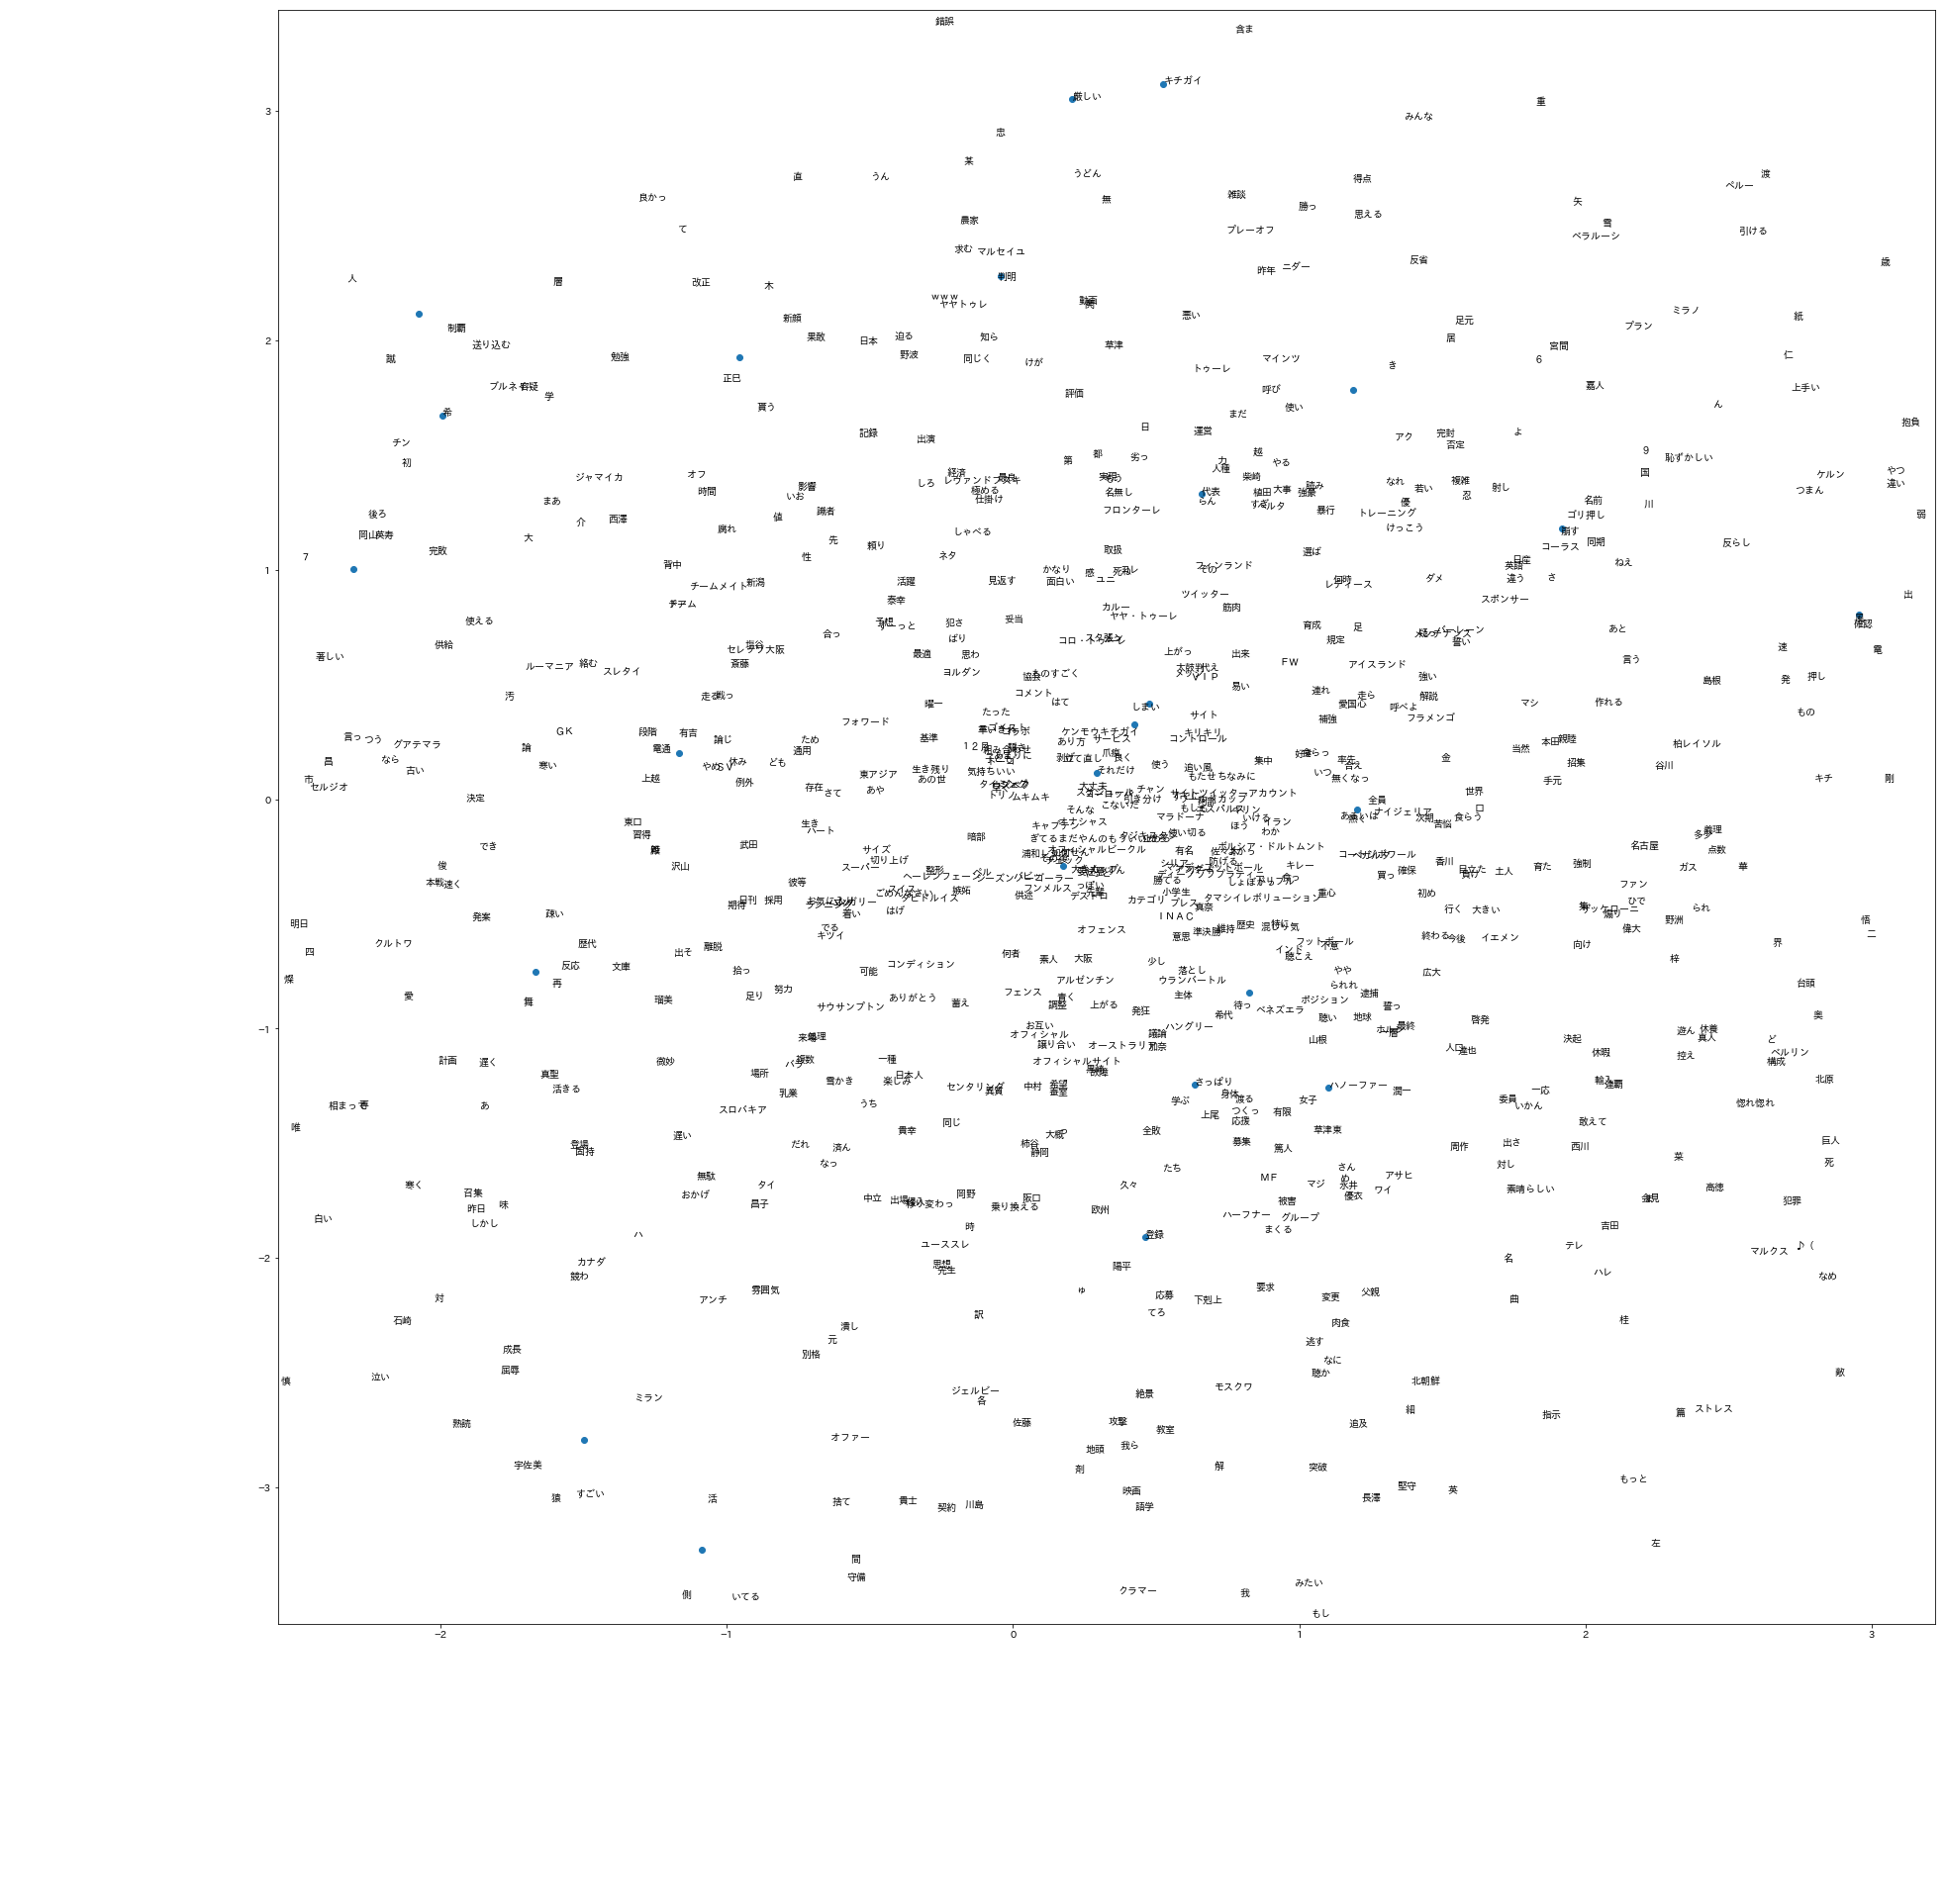

In [54]:
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
#font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
#font_prop = FontProperties(fname=font_path)
#mpl.rcParams['font.family'] = font_prop.get_name()

fig, ax = plt.subplots(figsize=[30,30])
ax.scatter(res_2d[::100, 0], res_2d[::100, 1])
for word, x, y in zip(list(model.wv.vocab)[::3], res_2d[::3, 0], res_2d[::3, 1]):
    ax.annotate(word, (x,y))

In [55]:
model.wv.most_similar(positive=["監督"])

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('指導', 0.32256847620010376),
 ('読み', 0.3199613690376282),
 ('マル', 0.3074295222759247),
 ('象牙', 0.29244327545166016),
 ('性交', 0.289198637008667),
 ('発狂', 0.27744174003601074),
 ('噫', 0.25977325439453125),
 ('腐っ', 0.25788336992263794),
 ('個々', 0.2557077705860138),
 ('高校', 0.24861493706703186)]

In [56]:
model.wv.most_similar(positive=["試合"])

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('読み', 0.3598612844944),
 ('ベテラン', 0.34452444314956665),
 ('実現', 0.33604252338409424),
 ('雪', 0.31377696990966797),
 ('ランゲラク', 0.29800623655319214),
 ('しゃべる', 0.29147660732269287),
 ('マインツ', 0.2880983054637909),
 ('勢', 0.2855464816093445),
 ('結局', 0.27123770117759705),
 ('語り', 0.259762704372406)]

In [57]:
model.wv.most_similar(positive=["日本"])

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('管理', 0.3308205306529999),
 ('相まって', 0.3242091238498688),
 ('謙虚', 0.31159430742263794),
 ('相変わらず', 0.2903575599193573),
 ('テルシュテーゲン', 0.28734874725341797),
 ('みんな', 0.28377223014831543),
 ('参加', 0.2805764079093933),
 ('雅彦', 0.276256263256073),
 ('天才', 0.26045116782188416),
 ('拝金', 0.25585079193115234)]

In [58]:
model.wv.most_similar("本田")

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('人組', 0.3671494722366333),
 ('イラク', 0.3154958486557007),
 ('挙げよ', 0.3124787509441376),
 ('イルボン', 0.2917046546936035),
 ('国見', 0.28481656312942505),
 ('マンデーフットボール', 0.28417807817459106),
 ('論', 0.275454580783844),
 ('毛', 0.27422279119491577),
 ('全然', 0.2706027030944824),
 ('活', 0.26954177021980286)]